<a href="https://colab.research.google.com/github/aravindh698/rep2/blob/master/ieee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd


In [43]:
df1=pd.read_csv('/content/Heart_Disease_Prediction.csv')
df1.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [44]:
df1.isnull().sum()
df1.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(['Presence','Absence'])
df1['Heart Disease']=df1['Heart Disease'].map({'Presence':1,'Absence':0})
Y=df1['Heart Disease']
Y[0:5]

0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: int64

[0.07508321 0.0656479  0.12011965 0.07560538 0.07481507 0.02045243
 0.03583393 0.10124642 0.10660112 0.09885272 0.07896988 0.14677229]


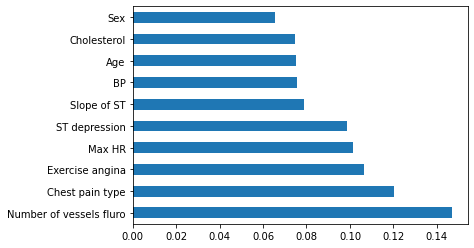

In [46]:
X = df1.iloc[:,0:12]  #independent columns
y = df1.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df1.iloc[:,0:12]  #independent columns
y = df1.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                      Specs       Score
7                    Max HR  168.929831
11  Number of vessels fluro   74.122652
9             ST depression   58.697286
4               Cholesterol   40.093093
8           Exercise angina   31.822472
0                       Age   18.485273
3                        BP   15.775632
2           Chest pain type   13.330455
6               EKG results    8.688587
1                       Sex    7.711475


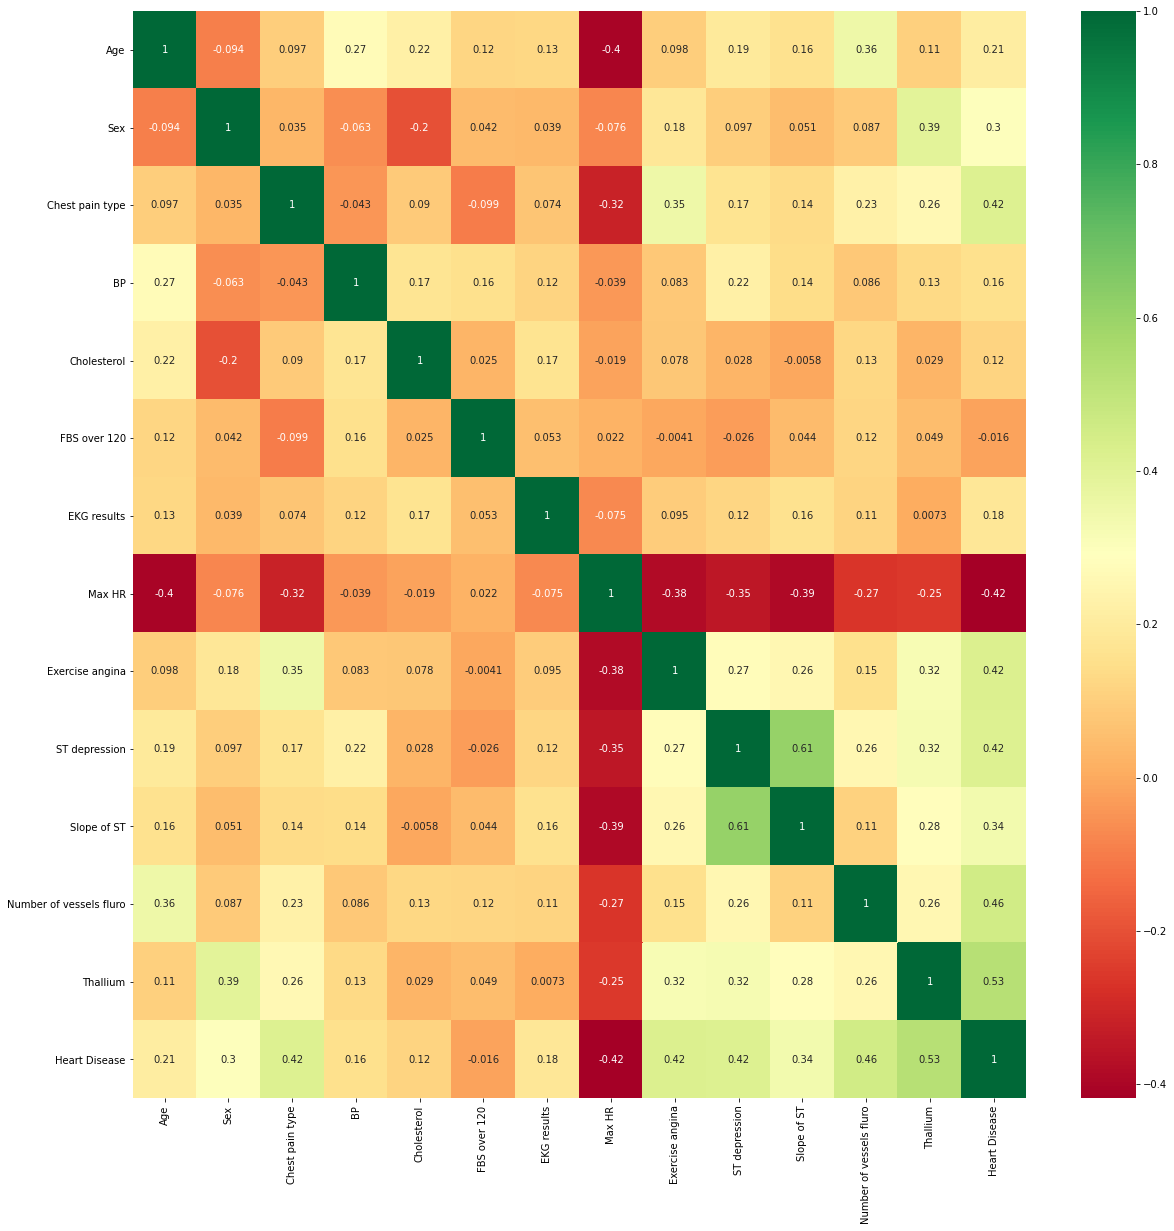

In [48]:
import seaborn as sns
X = df1.iloc[:,0:12]  #independent columns
y = df1.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [49]:
categorical_features=["Sex","Chest pain type","FBS over 120","EKG results","Exercise angina","Slope of ST","Number of vessels fluro","Thallium"]
df1[categorical_features]=df1[categorical_features].astype("category")


In [50]:
from sklearn.preprocessing import StandardScaler
continuous_features=set(df1.columns)-set(categorical_features)
scaler=StandardScaler()
df_norm=df1.copy()
df_norm[list(continuous_features)]=scaler.fit_transform(df1[list(continuous_features)])


In [51]:
df_norm_dummies=pd.get_dummies(df_norm)
df_norm_dummies

,Age,BP,Cholesterol,Max HR,ST depression,Heart Disease,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,FBS over 120_0,FBS over 120_1,EKG results_0,EKG results_1,EKG results_2,Exercise angina_0,Exercise angina_1,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,1.118034,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0
1,1.382140,-0.916759,6.093004,0.446409,0.481153,-0.894427,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,1.118034,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,-0.894427,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,-0.894427,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,2.280369,-0.981951,0.532904,-0.481153,-0.894427,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1
266,-1.147506,-0.636310,0.258589,1.008625,-0.918565,-0.894427,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1
267,0.172309,0.485490,0.859476,0.143677,0.218706,-0.894427,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0
268,0.282294,0.485490,-1.117635,-0.072560,-0.568636,-0.894427,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0


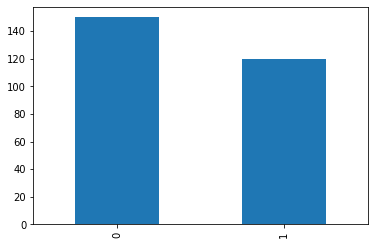

In [52]:
label=df1["Heart Disease"]
df1.drop("Heart Disease",axis=1,inplace=True)
label.value_counts().plot(kind="bar")
X_train,X_test,y_train,y_test=train_test_split(df_norm_dummies,label,test_size=0.15,stratify=label,random_state=10)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        18

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



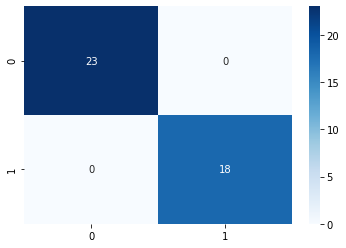

In [62]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
model=svm.SVC(C=0.10,kernel='rbf')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap=plt.cm.Blues)
print(classification_report(y_test,y_pred))


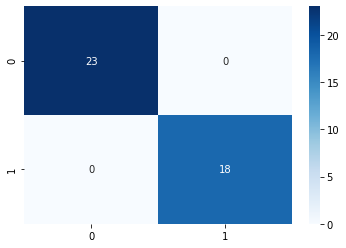

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        18

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



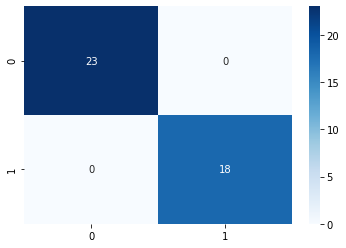

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        18

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



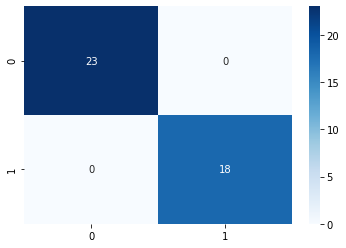

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        18

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



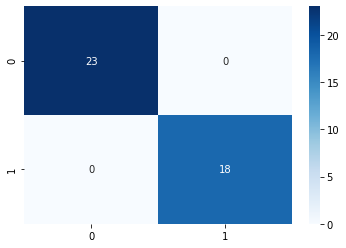

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        18

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
models=[SVC(),LogisticRegression(),GaussianNB(),DecisionTreeClassifier()]

for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap=plt.cm.Blues)
    plt.show()
    print(classification_report(y_test,y_pred))